# Week4 授業前課題2 住宅価格の予測

## 1.このテキストについて

### テキストの目的
- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする

### どのように学ぶか
定番のデータセットを通じて、回帰問題を解く流れやライブラリの使い方を学びます。

## 2.住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

## 3.データセットの準備
Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## 4.回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

### 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [2]:
df = pd.read_csv("train.csv") # データセットを読み込む
df_3col = df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]# 2つの特徴量と目的変数を抜き出す
display(df_3col.head())

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

評価のための指標値は回帰問題では **平均二乗誤差（Mean Squared Error, MSE）** を使うことが一般的です。

[sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。


In [3]:
X = df.loc[:, ['GrLivArea', 'YearBuilt']].as_matrix() # 説明変数をXに格納
y = df['SalePrice'].as_matrix() # 目的変数をyに格納

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # X, yを学習用データ、検証用データに分割
#print(np.shape(X_train))
#print(np.shape(X_test))
#print(np.shape(y_train))
#print(np.shape(y_test))

scaler = StandardScaler() # 標準化を行う
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train, y_train) # データを学習させる

y_pred = reg.predict(X_test) # 検証用データを推定させる

print(mean_squared_error(y_test, y_pred))
print(y_pred)

2314465092.7320137
[130445.81129484 306448.48211547  88741.8324304  168496.12883044
 227800.17562669  99569.77660678 186783.75135889 182056.44293199
  97457.76006969 151960.15487048 131192.06213304 117840.59883308
  84836.16656948 216795.82827786 226861.55984128 114354.20681418
 233851.35381306 133362.46046392  79874.70207186 210577.06633379
 191870.90367478 226090.42299764 212412.50678112 110884.40546558
 201927.81582345 174203.21527073 201986.40724909  98966.53796861
 215765.02046252 202036.70333958  89328.69003012 262849.94729844
 298537.18710817 112359.4779443  228219.23983687 138826.88586649
 193790.24081689 251971.28776788 295988.88679508 105906.0358499
 109778.31073838 259246.16279641 128015.21791264 267761.22052149
 120958.43236415 148080.42317423 117119.86289586 123196.13671951
 291177.99612118 167205.33559564 109342.34141015 191233.74998457
 165931.23784706 312885.33353957 153459.9037228  236198.05050049
 227305.82450466 150577.06478984 148691.32825201  99779.46593575
  41908

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


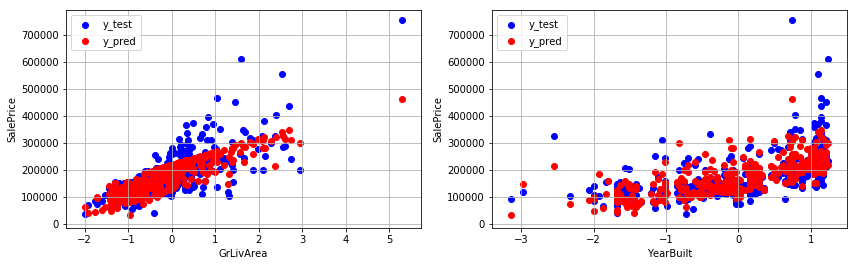

In [4]:
#plt.scatter(X_train[:, 0], y_train, color = 'b') # 説明変数と目的変数のデータ点の散布図をプロット
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)

plt.scatter(X_test[:, 0], y_test, color = 'b', label='y_test')
plt.scatter(X_test[:, 0], y_pred, color = 'r', label='y_pred')

plt.xlabel(df_3col.columns[0]) # x軸のラベル
plt.ylabel(df_3col.columns[2]) # y軸のラベル
plt.grid() # グリッド線を表示
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_test, color = 'b', label='y_test')
plt.scatter(X_test[:, 1], y_pred, color = 'r', label='y_pred')

plt.xlabel(df_3col.columns[1]) # x軸のラベル
plt.ylabel(df_3col.columns[2]) # y軸のラベル
plt.grid() # グリッド線を表示
plt.legend()

plt.show() # 図の表示

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

- [sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.svm.SVR — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)  
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [5]:
# グラフを描画する関数を作成
def draw_graph(X_test, y_test, y_pred):
    col_list =  ['GrLivArea', 'YearBuilt', 'SalePrice']
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)

    plt.scatter(X_test[:, 0], y_test, color = 'b', label='y_test')
    plt.scatter(X_test[:, 0], y_pred, color = 'r', label='y_pred')
    plt.legend()

    plt.xlabel(col_list[0]) # x軸のラベル
    plt.ylabel(col_list[2]) # y軸のラベル
    plt.grid() # グリッド線を表示

    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 1], y_test, color = 'b', label='y_test')
    plt.scatter(X_test[:, 1], y_pred, color = 'r', label='y_pred')

    plt.xlabel(col_list[1]) # x軸のラベル
    plt.ylabel(col_list[2]) # y軸のラベル
    plt.grid() # グリッド線を表示
    plt.legend()

    plt.show() # 図の表示

#### 線形回帰

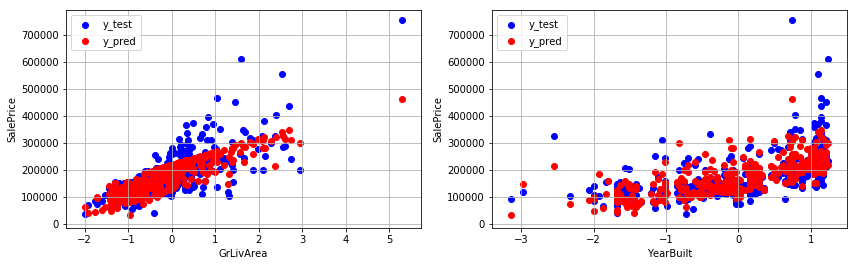

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train) # データを学習させる
#reg.score(X_train, y_train) 

reg_y_pred = reg.predict(X_test) # 検証用データを推定させる

mean_squared_error_list = [mean_squared_error(y_test, reg_y_pred)] # 評価値をリストに保存

draw_graph(X_test, y_test, reg_y_pred) # グラフの描画

#### SVM

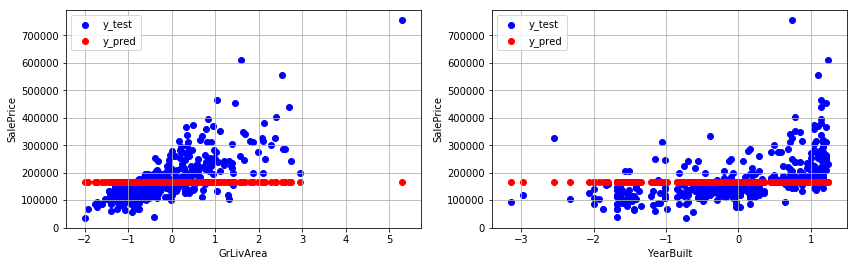

In [7]:
svm = SVR()
svm.fit(X_train, y_train) # データを学習させる

svm_y_pred = svm.predict(X_test) # 検証用データを推定させる

mean_squared_error_list.append(mean_squared_error(y_test, svm_y_pred)) # 評価値をリストに保存

draw_graph(X_test, y_test, svm_y_pred) # グラフを描画

#### 決定木

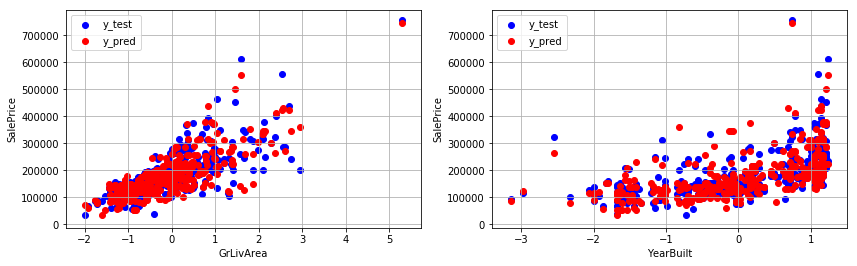

In [8]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train) # データを学習させる
tree_y_pred = tree.predict(X_test) # 検証用データを推定させる

mean_squared_error_list.append(mean_squared_error(y_test, tree_y_pred)) # 評価値をリストに保存

draw_graph(X_test, y_test, tree_y_pred) # グラフを描画

#### ランダムフォレスト

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


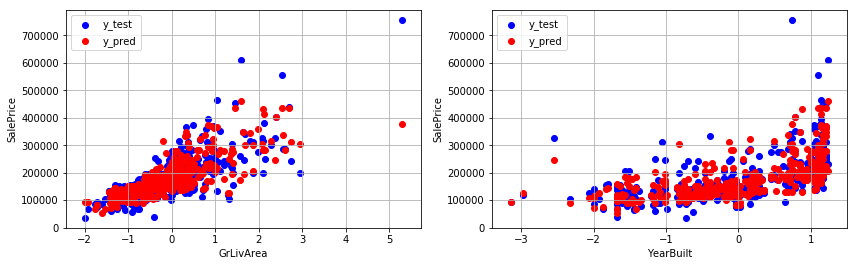

In [9]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train) # データを学習させる
forest_y_pred = forest.predict(X_test) # 検証用データを推定させる

mean_squared_error_list.append(mean_squared_error(y_test, forest_y_pred)) # 評価値をリストに保存

draw_graph(X_test, y_test, forest_y_pred) # グラフを描画

In [10]:
mean_squared_error_matrix = pd.DataFrame(mean_squared_error_list, columns=['平均二乗誤差'],
                                         index=['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'])
display(mean_squared_error_matrix)# 格納していた評価値の表を表示

,平均二乗誤差
線形回帰,2.314465e+09
SVM,7.169223e+09
決定木,2.276521e+09
ランダムフォレスト,2.104527e+09


### 【考察】
- SVMの手法だとうまく表現できなかった。
- 線形回帰は散布図を見るとGrLivAreaの方は予測値と正しい数値が少し乖離があるように見える。
- 決定木とランダムフォレストはうまく予測ができているように見える。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

[House Prices: Advanced Regression Techniques | Kaggl](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)

#### Week3 課題2で相関が高かった GarageArea, TotalBsmtSF, 1stFlrSF, YearRemodAdd の特徴量も加えてみる

In [11]:
df = pd.read_csv("train.csv") # データセットを読み込む
df_7col = df.loc[:, ['GrLivArea', 'YearBuilt','GarageArea', 'TotalBsmtSF',
                     '1stFlrSF','YearRemodAdd', 'SalePrice']]# 2つの特徴量と目的変数を抜き出す
display(df_7col.head()) # 抜き出した特徴量を表示

,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,1stFlrSF,YearRemodAdd,SalePrice
0,1710,2003,548,856,856,2003,208500
1,1262,1976,460,1262,1262,1976,181500
2,1786,2001,608,920,920,2002,223500
3,1717,1915,642,756,961,1970,140000
4,2198,2000,836,1145,1145,2000,250000


In [12]:
X = df.loc[:, ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd']].as_matrix() # 説明変数をXに格納
y = df['SalePrice'].as_matrix() # 目的変数をyに格納

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # X, yを学習用データ、検証用データに分割

scaler = StandardScaler() # 標準化を行う
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# グラフを描画する関数を作成
def draw_graph(X_test, y_test, y_pred):
    col_list =  ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'SalePrice']
    plt.figure(figsize=(14, 10))
    
    for i in range(len(col_list)-1):
        plt.subplot(3, 2, i+1)

        plt.scatter(X_test[:, i], y_test, color = 'b', label='y_test')
        plt.scatter(X_test[:, i], y_pred, color = 'r', label='y_pred')
       
        plt.xlabel(col_list[i]) # x軸のラベル
        plt.ylabel(col_list[-1]) # y軸のラベル
        plt.grid() # グリッド線を表示
        plt.legend()
        
    plt.show() # 図の表示

#### 線形回帰

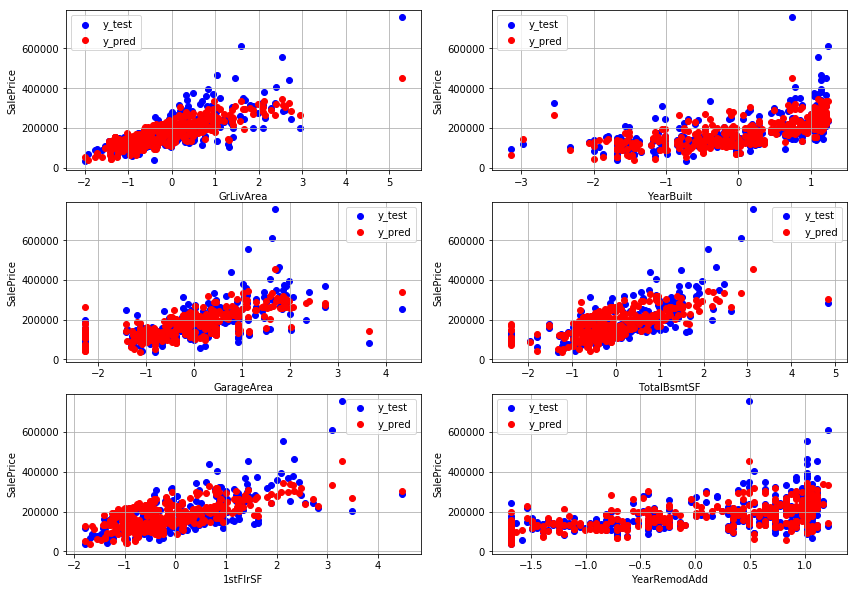

In [14]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train) # データを学習させる

reg_y_pred1 = reg1.predict(X_test) # 検証用データを推定させる

mean_squared_error_list1 = [mean_squared_error(y_test, reg_y_pred1)] # 評価値をリストに保存

draw_graph(X_test, y_test, reg_y_pred1) # グラフを描画

#### SVM

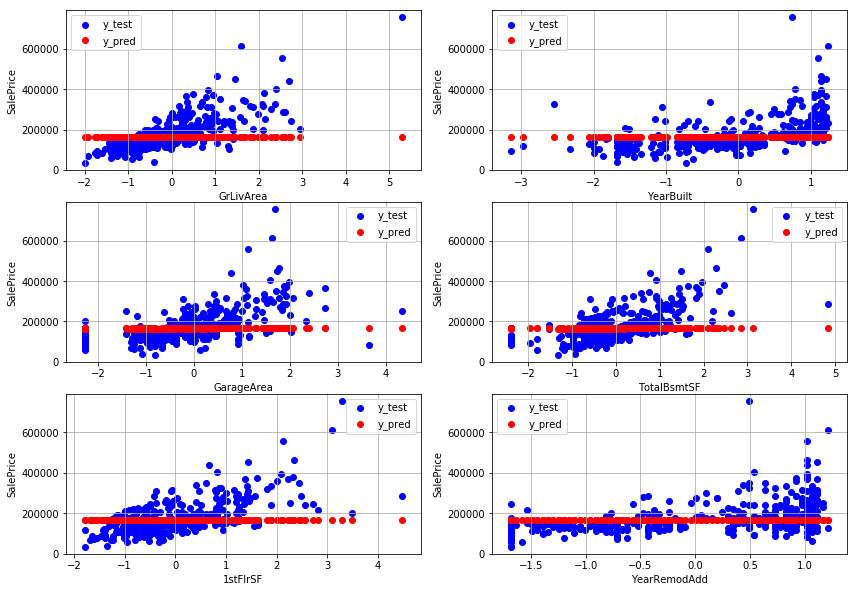

In [15]:
svm1 = SVR()
svm1.fit(X_train, y_train) # データを学習させる

svm_y_pred1 = svm1.predict(X_test) # 検証用データを推定させる

mean_squared_error_list1.append(mean_squared_error(y_test, svm_y_pred1)) # 評価値をリストに保存

draw_graph(X_test, y_test, svm_y_pred1) # グラフを描画

#### 決定木

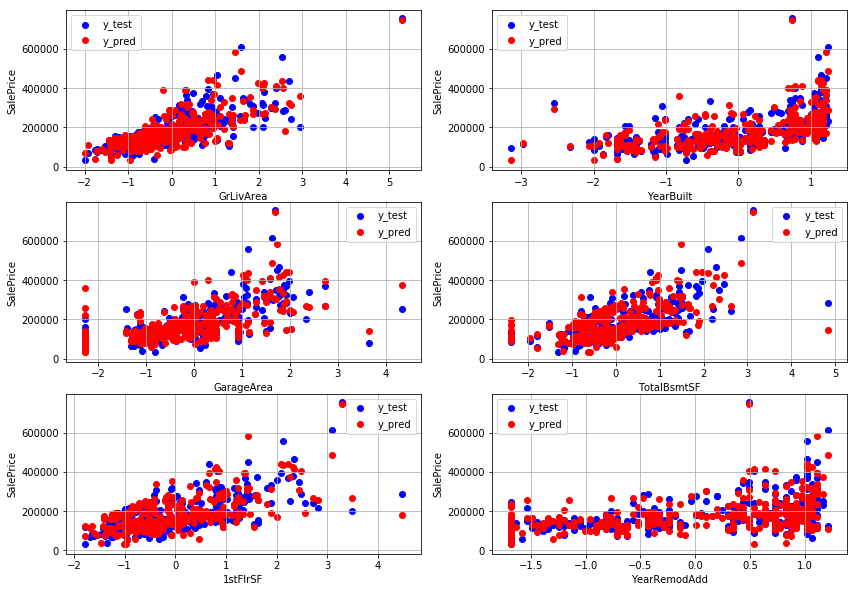

In [16]:
tree1 = DecisionTreeRegressor(random_state=0)
tree1.fit(X_train, y_train) # データを学習させる
tree_y_pred1 = tree1.predict(X_test) # 検証用データを推定させる

mean_squared_error_list1.append(mean_squared_error(y_test, tree_y_pred1)) # 評価値をリストに保存

draw_graph(X_test, y_test, tree_y_pred1) # グラフに描画

#### ランダムフォレスト

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


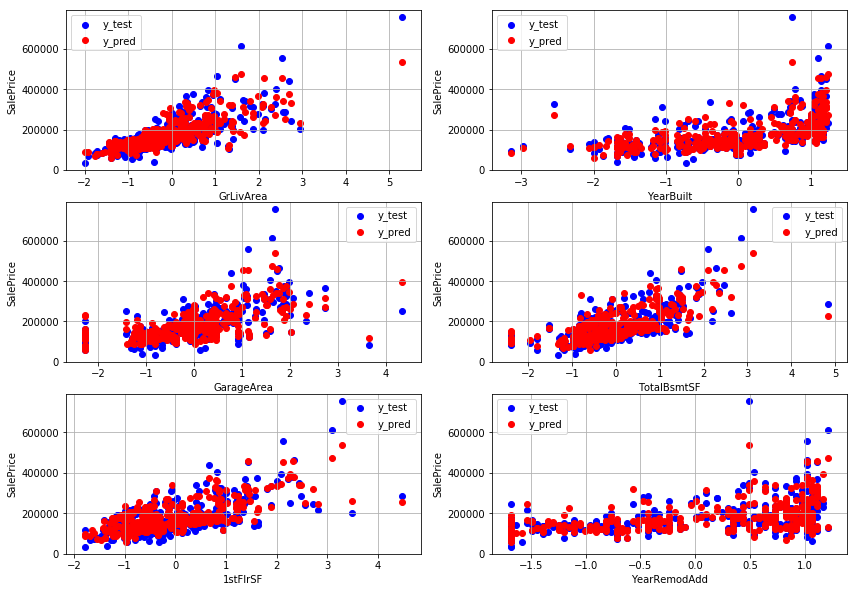

In [17]:
forest1 = RandomForestRegressor(random_state=0)
forest1.fit(X_train, y_train) # データを学習させる
forest_y_pred1 = forest1.predict(X_test) # 検証用データを推定させる

mean_squared_error_list1.append(mean_squared_error(y_test, forest_y_pred1)) # 評価値をリストに保存

draw_graph(X_test, y_test, forest_y_pred1) # グラフを描画

In [18]:
mean_squared_error_matrix1 = pd.DataFrame(mean_squared_error_list1, columns=['平均二乗誤差'],
                                          index=['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'])
display(mean_squared_error_matrix)# 説明変数が2種類だけの場合の評価値を表示
display(mean_squared_error_matrix1) # 説明変数を6つに増やした場合の評価値を表示

,平均二乗誤差
線形回帰,2.314465e+09
SVM,7.169223e+09
決定木,2.276521e+09
ランダムフォレスト,2.104527e+09


,平均二乗誤差
線形回帰,1.652939e+09
SVM,7.175670e+09
決定木,2.008437e+09
ランダムフォレスト,1.232928e+09


### 【考察】
- 線形回帰、決定木、ランダムフォレストは誤差が少なくなった。特にランダムフォレストは誤差が顕著に少なくなっている。